# <center>Project 1 Exploring the house prices of Auckland and Wellington area</center>

### <center>Yonggang Li (18043158)</center>

## Introduction 

New Zealand real estate price has soared in the past 5 years and gained the most attention of the people of all circles. In this project, the average house prices since 2013 of different areas of the two biggest cities of the country, Auckland and Wellington, are explored. The characteristics of the prices are researched, the trend and the return of investment for the two areas are compared. 
A few numbers of the data sets are dropped and imputed for practice purpose, please check https://www.enz.org/house-prices-auckland.html and https://www.enz.org/house-prices-wellington.html for the original.

### Import necessary data analysis libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pylab import rcParams
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['figure.figsize'] = 20, 15
rcParams['font.size'] = 24
rcParams['axes.facecolor'] = 'white'

%matplotlib inline

pd.set_option('html', True)

### Load and display the data
* <b>Load data from sheet 'Auckland' and 'Wellington' of MS Excel file
* <b>Concatenate these two data sets into one
* <b>Display the first 5 rows

In [10]:
auckland = pd.read_excel('house_price.xlsx', sheetname='Auckland', na_values=[".", "", "NA"])
wellington = pd.read_excel('house_price.xlsx', sheetname='Wellington', na_values=[".", "", "NA"])
house_price = pd.concat([auckland, wellington], ignore_index=True)
house_price.columns = ['Location', '2017', '2016', '2015', '2014', '2013']
house_price.head(5)

,Location,2017,2016,2015,2014,2013
0,Auckland North Shore - Coastal,1370000,1269000,1113000,979000,861000
1,Auckland North Shore - Onewa,954000,888000,779000,NaN,586000
2,Auckland North Shore - North Harbour,1184000,1090000,934000,819000,716000
3,Waitakere City,826000,NaN,657000,558000,482000
4,Auckland Central City,1076000,982000,856000,758000,685000


### Missing values imputation
* <b>Display all observations that missed some values

In [11]:
def contains_nan(df):
    hasNaN = False
    for year in df.columns[1:]:
        hasNaN |= df[year].isnull();
    return hasNaN

house_price[contains_nan(house_price)]

,Location,2017,2016,2015,2014,2013
1,Auckland North Shore - Onewa,954000,888000,779000,NaN,586000
3,Waitakere City,826000,NaN,657000,558000,482000
7,Auckland City - Islands,1074000,933000,835000,NaN,683000


The prices missed for 2014 and 2016 in three area. The average of the previous and next year is used to fill the missing value.

* <b>Fill the missing value with the average of its left and right neighabours

In [12]:
def na_value(df, left_col, right_col):
    return (df[left_col] + df[right_col])/2

house_price['2016'].fillna(value=na_value(house_price, '2017', '2015'), inplace=True)
house_price['2014'].fillna(value=na_value(house_price, '2016', '2013'), inplace=True)

house_price.iloc[1]

Location    Auckland North Shore - Onewa
2017                              954000
2016                              888000
2015                              779000
2014                              737000
2013                              586000
Name: 1, dtype: object

### Show me the characteristics of the data, such as min, max, and median by year

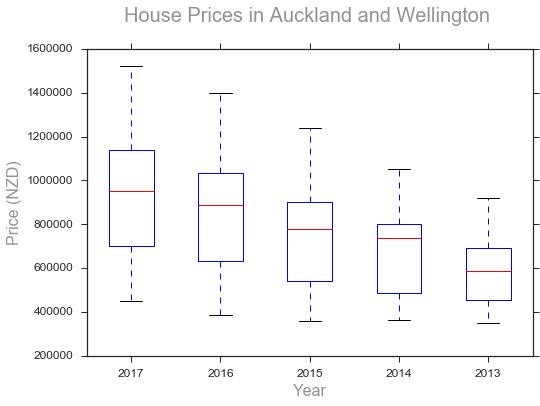

In [13]:
sns.set(style="ticks", font_scale=1.2)
house_price.plot(kind='box')
plt.title("House Prices in Auckland and Wellington \n", fontsize=20, alpha=0.5)
plt.xlabel('Year', fontsize=16, alpha=0.5)
plt.ylabel('Price (NZD)', fontsize=16, alpha=0.5)

The plot clearly shows that how the house price changed in the past 5 years. Although the lowest price, around 400,000 NZD, is generally stable, only move up a little in 2017, the highest, the upper and lower quartiles and median have been pulled up dramatically from 1,000,000, 750,000, 450,000 and 600,000 to 1,500,000, 1,150,000, 700,000 and 970,000 respectively.

### Give me the average house prices by year of Auckland and Wellington region
* <b>Calculate the average house price by year for Auckland and Wellington
* <b>Sort ascendingly the data by year

In [14]:
auckland = house_price[house_price['Location'].str.contains('Wellington') == False]
auckland_average = auckland[auckland.columns[1:]].apply(np.mean, axis=0).sort_index(ascending=True)
wellington = house_price[house_price['Location'].str.contains('Wellington')]
wellington_average = wellington[wellington.columns[1:]].apply(np.mean, axis=0).sort_index(ascending=True)
average_prices = pd.merge(pd.DataFrame({"Auckland":auckland_average}), pd.DataFrame({"Wellington":wellington_average}), left_index=True, right_index=True)
average_prices

,Auckland,Wellington
2013,646909.090909,453500
2014,744090.909091,469750
2015,847454.545455,466750
2016,974590.909091,500750
2017,1075545.454545,575250


* <b>Display the average prices in line chart

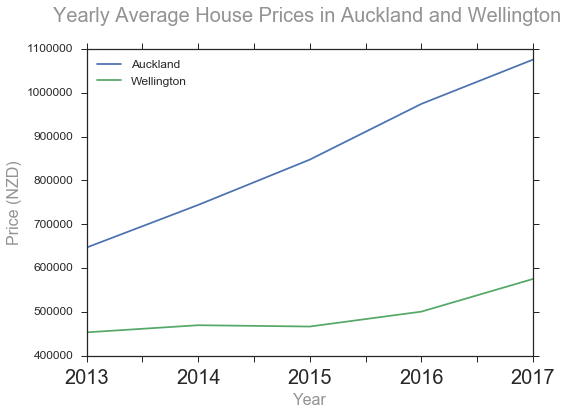

In [15]:
average_prices.plot()
plt.xticks(rotation=0, fontsize=20)
plt.title("Yearly Average House Prices in Auckland and Wellington \n", fontsize=20, alpha=0.5)
plt.xlabel('Year', fontsize=16, alpha=0.5)
plt.ylabel('Price (NZD)', fontsize=16, alpha=0.5)

From the above curve, we can see that the average house prices in Auckland since 2013 have been increasing steadily and form a perfect trend-line. The average prices in Wellington are much lower and rised gently before 2015 and then gained accelearated. However, the price gap between Auckland and Wellington is still getting bigger.

### Which area gives the people maximum return if invested on a house in 2013
* <b>Create a new column "ROI" which will be calcualte by formula ROI = p2017/p2013 -1
* <b>Create a new column "ROI" which will be yearly compounded growth and calcualte by formula CAGR = power(p2017/p2013, 1/4)-1
* <b>Sort the ROI descendingly

In [27]:
house_price['ROI'] = 100*(house_price['2017']/house_price['2013'] - 1) 
house_price['CAGR'] = 100*(np.power(house_price['2017']/house_price['2013'], 1.0/4) - 1) 
roi = house_price[['Location','ROI', 'CAGR']].sort_values(ascending=False, by='ROI')
roi.head(5)

,Location,ROI,CAGR
10,Manukau - North West,83.847981,16.443357
8,Manukau - East,82.853026,16.285493
9,Manukau - Central,72.727273,14.641069
3,Waitakere City,71.369295,14.415076
5,Auckland City - East,65.472313,13.417830


The top five Return Of Investment (ROI) and Compounded Average Growth Rate (CAGR)

* <b>Use bar char to display the highest and lowest 3 ROIs 

In [31]:
top_bottom_3 = pd.concat([roi.head(3), roi.tail(3)], ignore_index=True)
print top_bottom_3


                   Location        ROI       CAGR
0      Manukau - North West  83.847981  16.443357
1            Manukau - East  82.853026  16.285493
2         Manukau - Central  72.727273  14.641069
3      Wellington – Eastern  30.018083   6.782710
4  Wellington – Hutt Valley  28.735632   6.518414
5      Wellington – Central  14.666667   3.480685


The top and the bottom three ROI and CAGR.

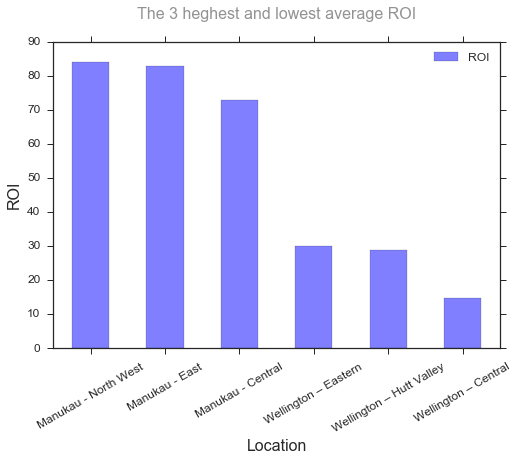

In [34]:
top_bottom_3.plot(kind='bar', x='Location', y='ROI', color='blue', alpha=0.5, rot=30)
plt.title("The 3 heghest and lowest average ROI\n", fontsize=16, alpha=0.5)
plt.ylabel('ROI', fontsize=16)
plt.xlabel('Location', fontsize=16)

As the above figure shows that the houses in Manukau reward the investors most, the most attactive areas are north east, east and central in order. Meanwhile, if the investors put their money to Wellington, especially in the central area, their gains may be just better than letting their money sleep in bank. 

## Conclusion

Auckland house price increased at a shocking compounded growth rate, since 2013 the price in north west of Manukau almost doubled and the last, central city, also gained amazing 12% which tops highest area Northern Wellington by 4.5 percent. The central of Wellington is the slowest 3.4% among all these 15 areas, running neck and neck with bank interest. On the other hand, as there is a huge gap between these two biggest cities and the appreciation potential becomes more and more obvious, Wellington migh be a good choice for investors for the next five years.
